In [1]:
import sys
import os
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)
#from autoda.data_augmentation import ImageAugmentation
from fanova import fANOVA
from fanova import visualizer



sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [3]:
-
    


77 cifar10
440 cifar10
441 cifar10
444 cifar10
445 cifar10
446 cifar10
447 cifar10
448 cifar10
450 cifar10
452 cifar10
454 cifar10
467 cifar10
469 cifar10
470 cifar10
475 cifar10


In [5]:
dataset = "cifar10"

#config_space = ImageAugmentation.get_config_space()
params= ['vertical_flip', 'horizontal_flip', 'augment_probability', 'scale_lower', 'scale_upper',
        'scale_probability', 'pad_upper', 'pad_lower', 'pad_probability', 'crop_upper', 'crop_lower',
        'crop_probability', 'rotation_upper', 'rotation_lower', 'rotation_probability' 
       ] # change order to params

X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(params):
        #print(j, k)
        
        if c[k] is not None: 
            vec.append(c[k])
            #print(k, c[k])
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

In [6]:
# best config: config with minimum validation error
best_config_idx = np.argmin(results[dataset]['validation_error'])
print("Best Validation Error:", y[best_config_idx], "\n", "Best Augmentation Configuration found: ", results[dataset]['configs'][best_config_idx])



Best Validation Error: 0.19020000000000004 
 Best Augmentation Configuration found:  {'pad_probability': 0.3372122249482107, 'rotation_lower': -98, 'crop_upper': 0.13864114293060747, 'rotation_probability': 0.02946458567349186, 'crop_lower': 0.05711824605046402, 'pad_upper': 0.2702885588946169, 'augment_probability': 0.7949323874352481, 'scale_probability': 0.8599600250317505, 'pad_lower': 0.014194537529628482, 'scale_upper': 1.3919386199115533, 'vertical_flip': 0.1968858131253335, 'scale_lower': 0.6193085146142356, 'rotation_upper': 10, 'horizontal_flip': 0.8162148485119575, 'crop_probability': 0.3768401987264287}


In [ ]:
PDF plots of validation error results on augmented MNIST image data

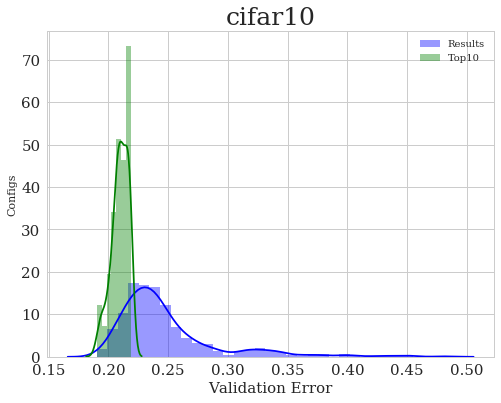

In [7]:
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
top10 = np.sort(validation_error)[:100]
sns.distplot(validation_error, label='Results', norm_hist=True,  color="blue")
sns.distplot(top10, label='Top10', norm_hist=True, color="green")
plt.legend()
plt.ylabel("Configs")
plt.xlabel("Validation Error", fontsize=15)
plt.title(dataset, fontsize=25)

Runtime CDF Plots

Best Augmentation Found:  0.19 No Augmentation:  0.189


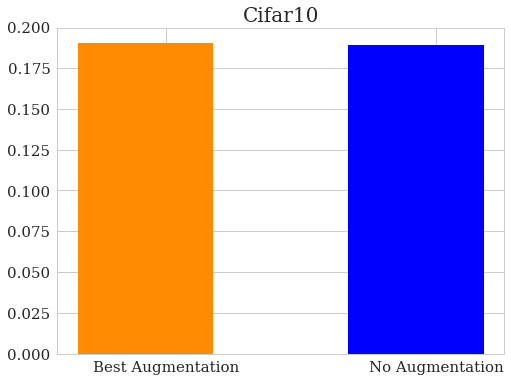

In [47]:
# Plot bar plots of no_augmention, best found configuration and default data augmentation
no_aug_path = path_join(abspath("."), "..", "..", "AutoData/cifar10")
idx = np.argmin(y)
best_config =  y[idx]
no_augment = json.load(open(path_join(no_aug_path, "random_search_cifar10_1.json")))["validation_error"]

print('Best Augmentation Found: ', np.round(best_config, 3), "No Augmentation: ", np.round(no_augment, 3))

N =2
ind = np.arange(N)  
width = 0.15

f, ax = plt.subplots()
#ax = sns.barplot(x="day", y="total_bill", data=tips)
rects1 = ax.bar(0, best_config, width=0.5, color="darkorange",  label="best augmentation")
rects2 = ax.bar(1,no_augment, width=0.5, color="blue", label="no augment")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Best Augmentation', 'No Augmentation'))
#ax.legend((rects1, rects2), ('Best augmentation found', 'No augmentation'))
ax.set_title("Cifar10", fontsize=20)


In [7]:
# bar plots showing the best augmentation config found and no augmentation with variance over 10 runs, 
# do 10 runs with standard augmentation and plot them here
no_aug_path = path_join(abspath("."), "..", "..", "AutoData/random_search/best_config")
print(no_aug_path)
for d in datasets:
    p = dict()
    validation_error  = []
    n_runs = 10
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            config_path = "%s/random_search_%s_%d.json" % (d, d, i)
            filename = path_join(no_aug_path, config_path)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        learning_curve.append(res['train_history'])
        runtime.append(res['used_budget'])
        validation_error.append(res["validation_error"])
p['validation_error'] = validation_error
results[d] = p


{'rotation_upper': 123, 'rotation_probability': 0.17811700990661483, 'augment_probability': 0.3011532555438601, 
 'crop_probability': 0.07833836147636386, 'vertical_flip': 0.020157282616370953, 'crop_upper': 0.1333469311889449, 
 'pad_upper': 0.19568883772204565, 'scale_probability': 0.321709600646349, 'horizontal_flip': 0.0375793923692479, 
 'pad_lower': 0.06674063826933348, 'pad_probability': 0.17425131121264692, 'crop_lower': 0.07436109469033245,
 'scale_lower': 0.621385805554965, 'rotation_lower': -89, 'scale_upper': 1.1298614264673597}

/mhome/negassim/AutoDA/notebooks/../../AutoData/random_search/best_config


{'augment_probability': 0.3011532555438601,
 'crop_lower': 0.07436109469033245,
 'crop_probability': 0.07833836147636386,
 'crop_upper': 0.1333469311889449,
 'horizontal_flip': 0.0375793923692479,
 'pad_lower': 0.06674063826933348,
 'pad_probability': 0.17425131121264692,
 'pad_upper': 0.19568883772204565,
 'rotation_lower': -89,
 'rotation_probability': 0.17811700990661483,
 'rotation_upper': 123,
 'scale_lower': 0.621385805554965,
 'scale_probability': 0.321709600646349,
 'scale_upper': 1.1298614264673597,
 'vertical_flip': 0.020157282616370953}

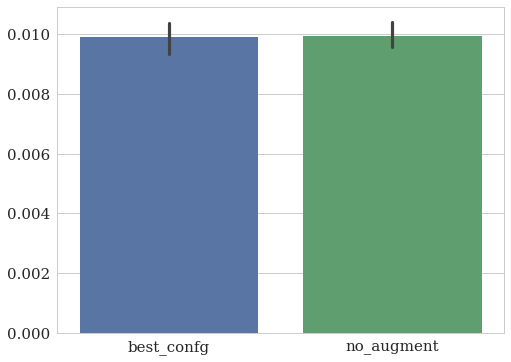

In [27]:
import pandas as pd

y_best_config =[0.009916666666666685, 0.010083333333333333, 0.010000000000000009, 0.010249999999999981,
                 0.010249999999999981, 0.007916666666666683, 0.011166666666666658, 0.010000000000000009, 
                 0.009499999999999953]

y_no_augment = [0.00924999999999998, 0.010583333333333278, 0.00924999999999998, 0.00983333333333336, 
                0.009083333333333332, 0.009750000000000036, 0.009916666666666685, 0.010750000000000037, 
                0.011083333333333334]
data = pd.DataFrame({"best_confg": y_best_config, "no_augment": y_no_augment})
ax = sns.barplot(data=data)

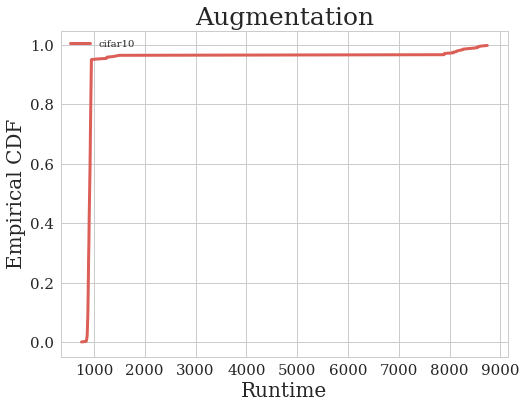

In [8]:
datasets = ["cifar10"]
current_palette = sns.color_palette("hls", len(datasets))
sns.set_palette(current_palette)

for i, d in enumerate(datasets):
    
    linestyle = ["--", ":"]

    sorted_error = np.sort(runtime)
    yvals = np.arange(len(sorted_error))/float(len(sorted_error))
    plt.plot(sorted_error, yvals, linewidth=3, label=d)

plt.legend(loc=2, fontsize=10)
#plt.xscale("log")
plt.ylabel("Empirical CDF", size=20)
plt.xlabel("Runtime", fontsize=20)
plt.title('Augmentation', fontsize=25)
plt.show()


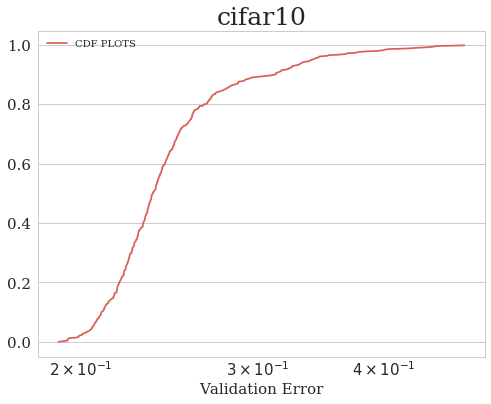

In [9]:
dataset = "cifar10"
sorted_error = np.sort(validation_error)
yvals = np.arange(len(sorted_error)) / float(len(sorted_error))
plt.plot(sorted_error, yvals, label= "CDF PLOTS")
plt.legend(loc=2, fontsize=10)
plt.xlabel("Validation Error", fontsize=15)
plt.xscale('log')
plt.title(dataset, fontsize=25)

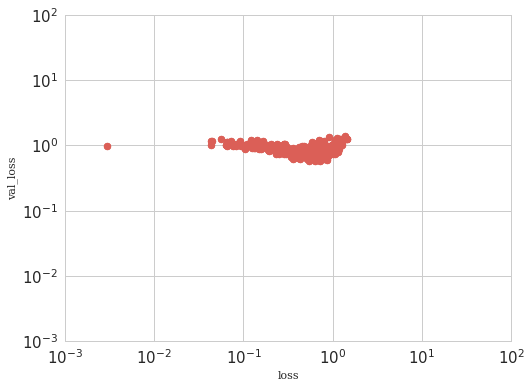

In [10]:
loss = [np.nan_to_num(learning_curve[i]["loss"][-1]) for i in range(900)]
val_loss = [np.nan_to_num(learning_curve[i]["val_loss"][-1]) for i in range(900)]
loss = np.array(loss)
val_loss = np.array(val_loss)
loss[loss == 0] = 100
val_loss[val_loss == 0] = 100

plt.scatter(loss, val_loss)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-3, 100)
plt.ylim(1e-3, 100)
plt.xlabel("loss")
plt.ylabel("val_loss")

711


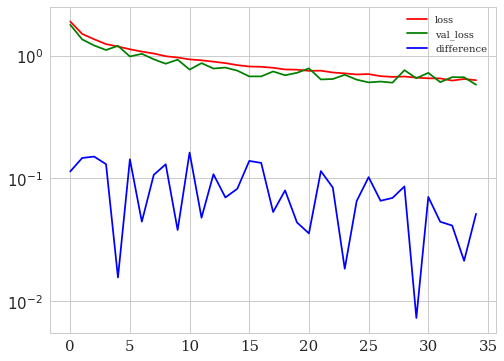

710


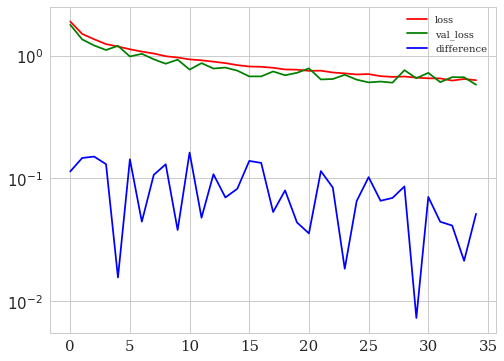

766


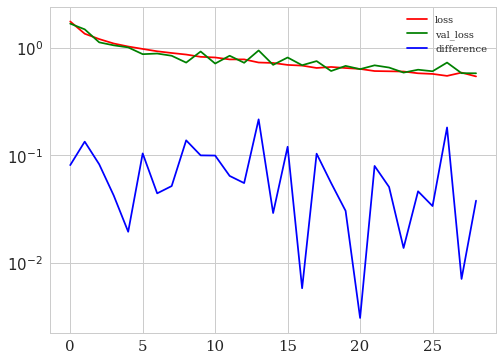

767


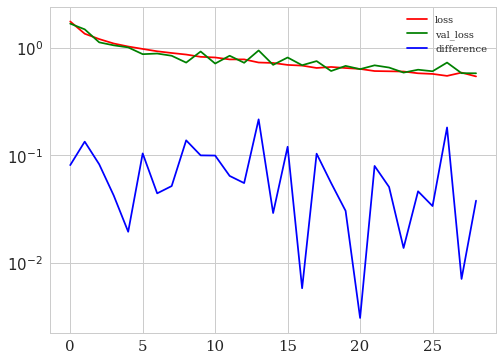

290


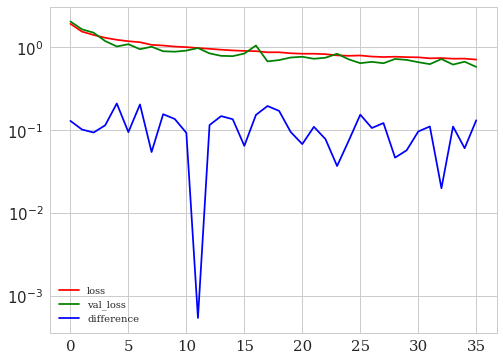

In [11]:
for b in np.argsort(val_loss)[:5]:
    print(b)
    plt.plot(learning_curve[b]["loss"],'r', label="loss")
    plt.plot(learning_curve[b]["val_loss"],'g', label="val_loss")
    plt.plot(np.abs(np.array(learning_curve[b]["val_loss"])-np.array(learning_curve[b]["loss"])),'b',label="difference")
    #plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

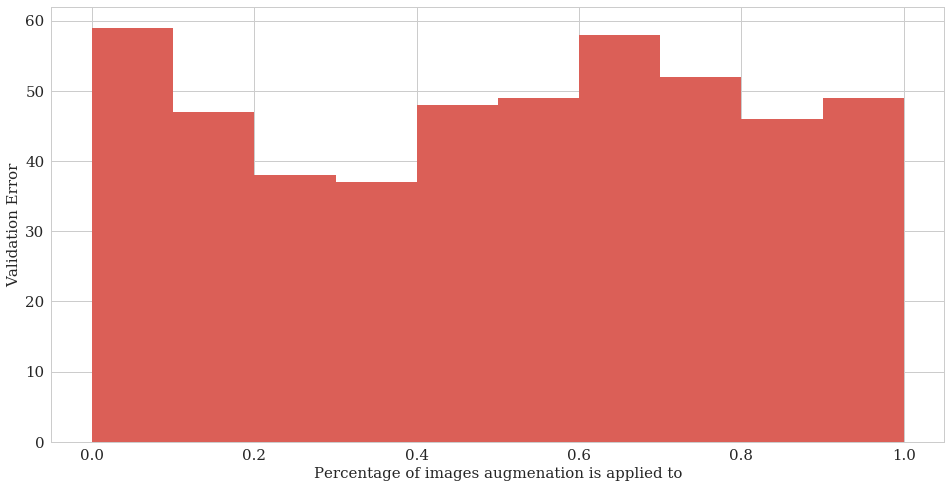

In [17]:
plt.figure(figsize=(16, 8))
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
augment_probability= results[dataset]["augment_probability"]
plt.hist(augment_probability)
#augment_probability = np.round(augment_probability, 1)
#ax = sns.boxplot(x=augment_probability, y=validation_error)
#ax = sns.swarmplot(x=augment_probability, y=validation_error, color=".40")
#ax.set_title(' Effect of Augmentation on Mnist')
plt.xlabel("Percentage of images augmenation is applied to", size=15)
plt.ylabel("Validation Error", size=15)

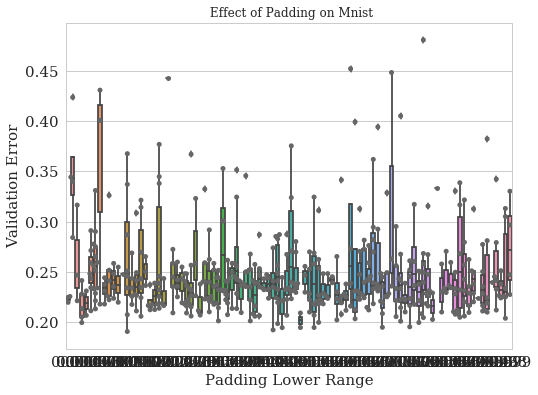

In [18]:
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
pad_lower= results[dataset]["pad_lower"]
pad_lower = np.round(pad_lower,3)
ax = sns.boxplot(x=pad_lower, y=validation_error)
ax = sns.swarmplot(x=pad_lower, y=validation_error, color=".40")
ax.set_title(' Effect of Padding on Mnist')
plt.xlabel("Padding Lower Range", size=15)
plt.ylabel("Validation Error", size=15)


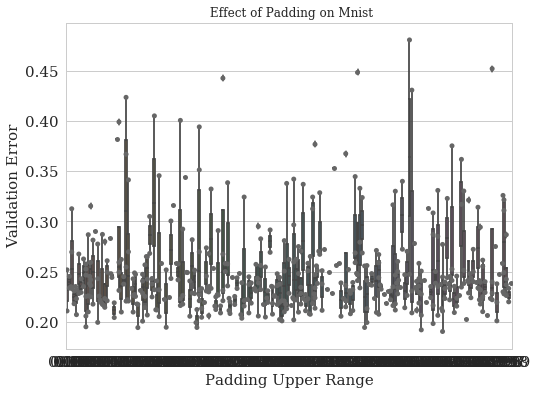

In [15]:
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
pad_upper= results[dataset]["pad_upper"]
pad_upper = np.round(pad_upper,3)
ax = sns.boxplot(x=pad_upper, y=validation_error)
ax = sns.swarmplot(x=pad_upper, y=validation_error, color=".40")
ax.set_title(' Effect of Padding on Mnist')
plt.xlabel("Padding Upper Range", size=15)
plt.ylabel("Validation Error", size=15)

In [ ]:

dataset = "mnist"
validation_error = results[dataset]["validation_error"]
pad_probability= results[dataset]["pad_probability"]
pad_probability = np.round(pad_probability,1)
ax = sns.boxplot(x=pad_probability, y=validation_error)
ax = sns.swarmplot(x=pad_probability, y=validation_error, color=".40")
# ax.set(xticklabels=[])
ax.set_title(' Effect of Padding on Mnist')
plt.xlabel("Padding Probability Range", size=15)
plt.ylabel("Validation Error", size=15)

In [ ]:
dataset = "mnist"
validation_error = results[dataset]["validation_error"]
scale_lower= results[dataset]["scale_lower"]
scale_lower = np.round(scale_lower,1)
ax = sns.boxplot(x=scale_lower, y=validation_error)
ax = sns.swarmplot(x=scale_lower, y=validation_error, color=".40")
ax.set_title(' Effect of Rescaling down on Mnist')
plt.xlabel("Scale Lower Range", size=15)
plt.ylabel("Validation Error", size=15)

In [ ]:
dataset = "mnist"
validation_error = results[dataset]["validation_error"]
scale_upper= results[dataset]["scale_upper"]
scale_upper = np.round(scale_upper,1)
ax = sns.boxplot(x=scale_upper, y=validation_error)
ax = sns.swarmplot(x=scale_upper, y=validation_error, color=".40")
ax.set_title(' Effect of Scaling on Mnist')
plt.xlabel("Scale Upper Range", size=15)
plt.ylabel("Validation Error", size=15)

Effect of Rescale on Mnist data

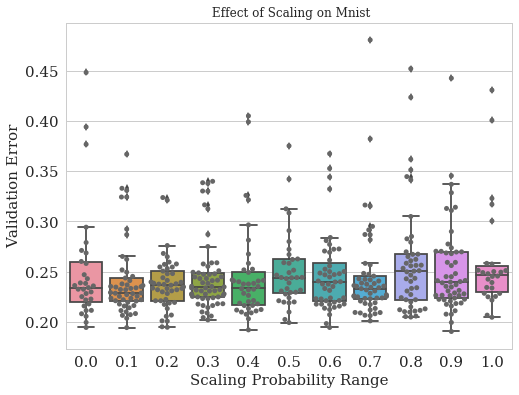

In [21]:

dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
scale_probability= results[dataset]["scale_probability"]
scale_probability = np.round(scale_probability,1)
ax = sns.boxplot(x=scale_probability, y=validation_error)
ax = sns.swarmplot(x=scale_probability, y=validation_error, color=".40")
ax.set_title(' Effect of Scaling on Mnist')
plt.xlabel("Scaling Probability Range", size=15)
plt.ylabel("Validation Error", size=15)

Plot to show effect of Horizontal Flip on Mnist Data

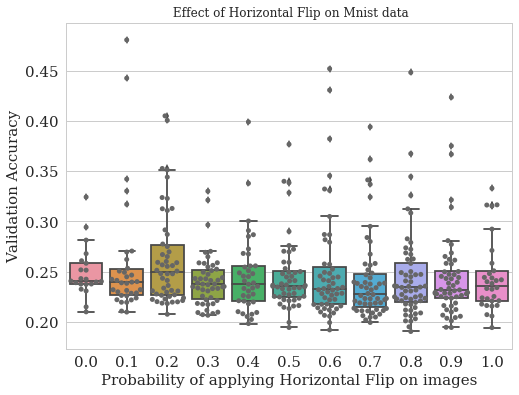

In [22]:
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
hor_flip= results[dataset]["horizontal_flip"]
hor_flip = np.round(hor_flip, 1)
ax = sns.boxplot(x=hor_flip, y=validation_error)
ax = sns.swarmplot(x=hor_flip, y=validation_error, color=".40")
ax.set_title(' Effect of Horizontal Flip on Mnist data')
plt.xlabel("Probability of applying Horizontal Flip on images", size=15)
plt.ylabel("Validation Accuracy", size=15)

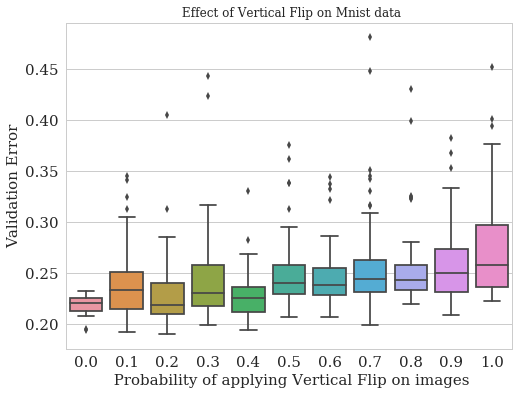

In [24]:
dataset = "cifar10"
validation_error= results[dataset]["validation_error"]
vertical_flip= results[dataset]["vertical_flip"]
vertical_flip = np.round(vertical_flip, 1)
ax = sns.boxplot(x=vertical_flip, y=validation_error)
#ax = sns.swarmplot(x=vertical_flip, y=validation_error, color=".40")
ax.set_title(' Effect of Vertical Flip on Mnist data')
plt.xlabel(" Probability of applying Vertical Flip on images", size=15)
plt.ylabel("Validation Error", size=15)

Effect of Rotation Range on Mnist Data

Make FANOVA Plots

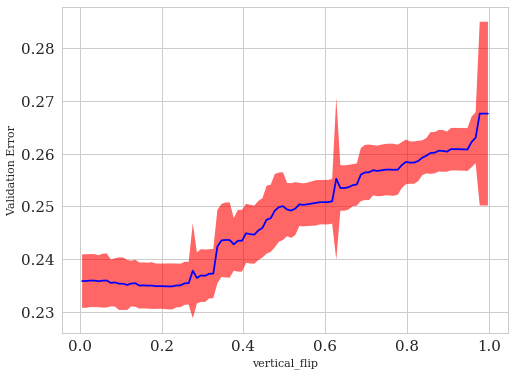

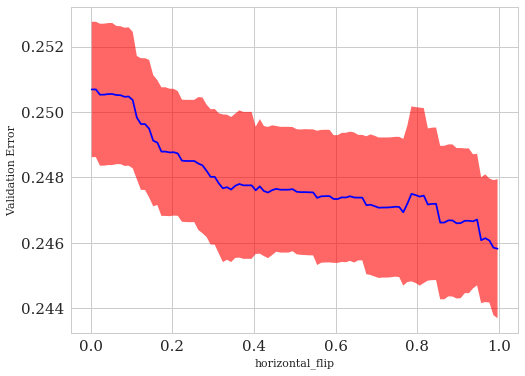

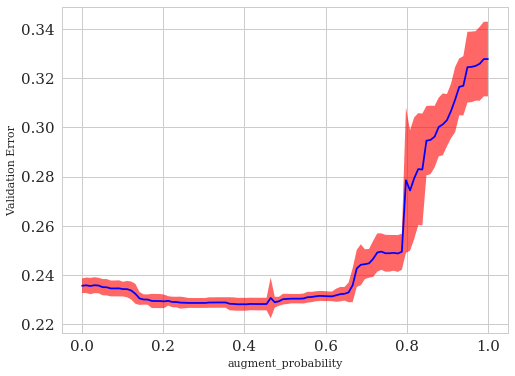

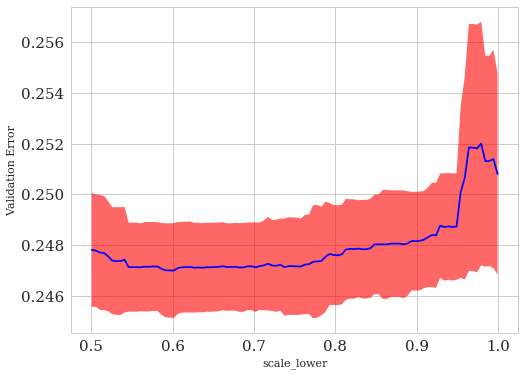

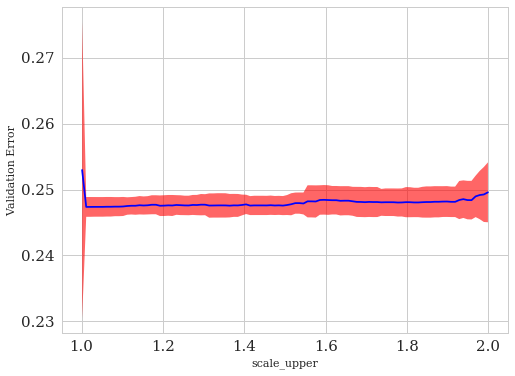

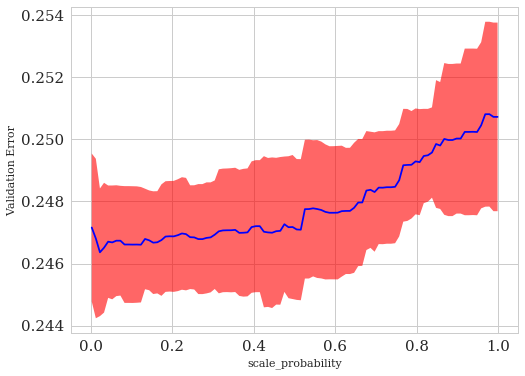

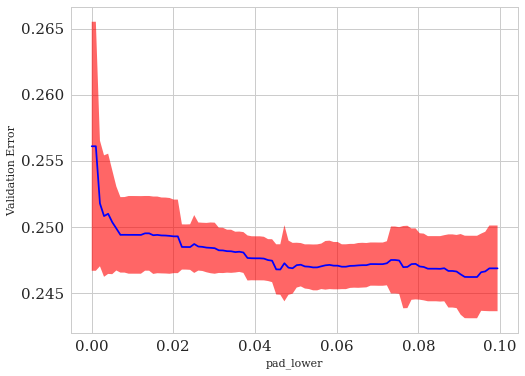

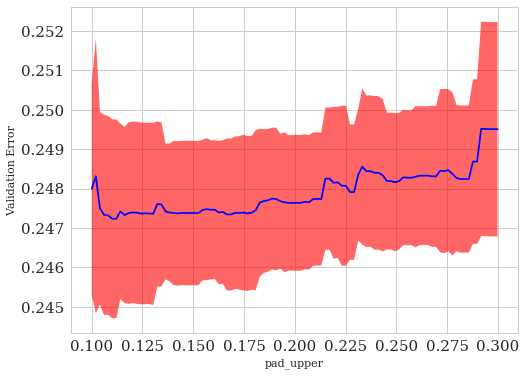

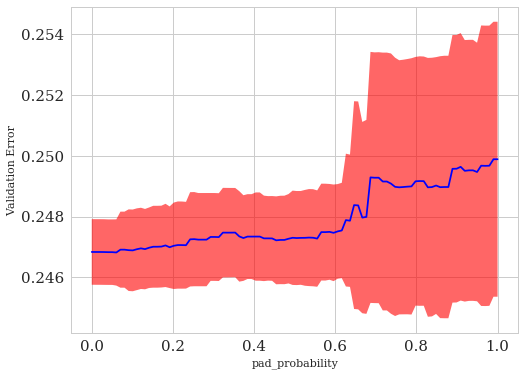

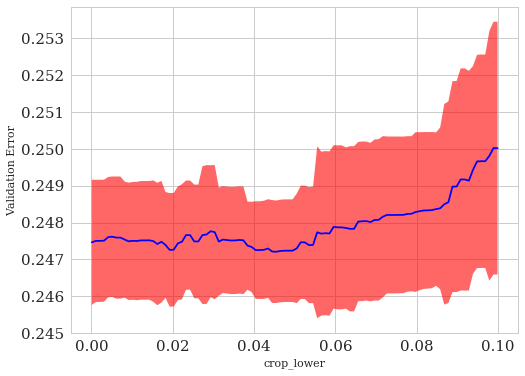

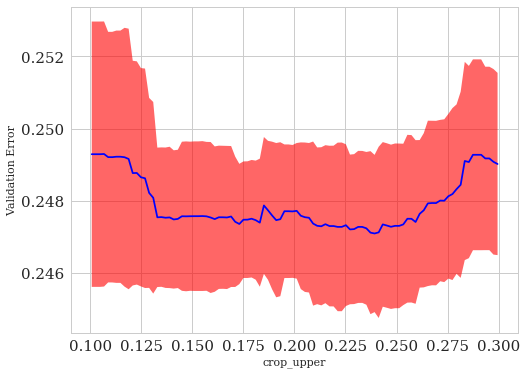

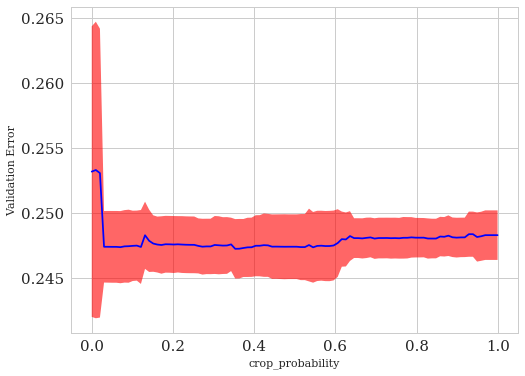

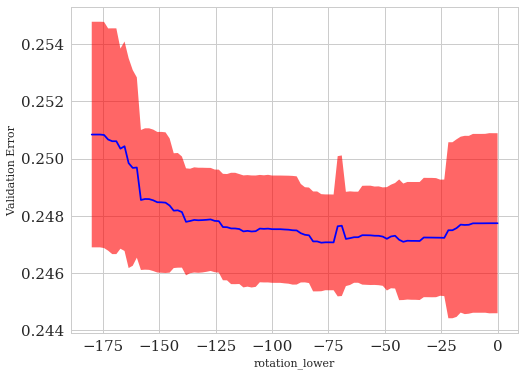

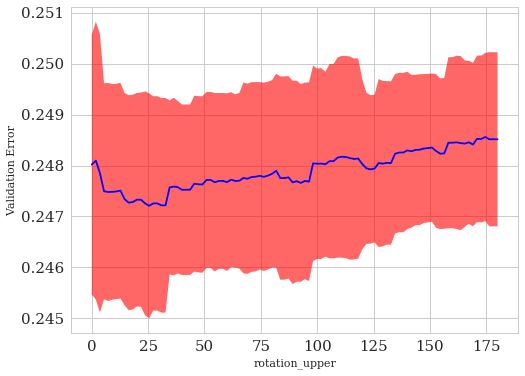

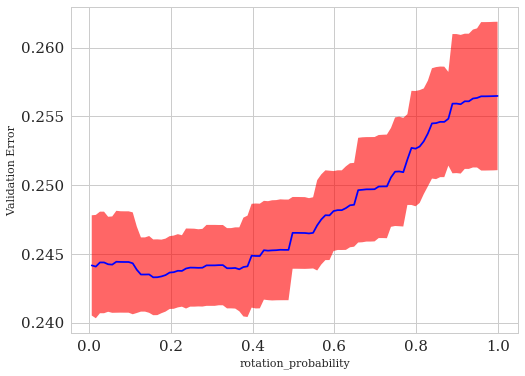

In [25]:
dataset = "cifar10"

order= ['vertical_flip', 'horizontal_flip', 'augment_probability', 'scale_lower', 'scale_upper',
        'scale_probability', 'pad_lower', 'pad_upper',  'pad_probability', 'crop_lower','crop_upper', 
        'crop_probability', 'rotation_lower', 'rotation_upper','rotation_probability' 
       ] # change order to params
#config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

f = fANOVA(X, y)
vis = visualizer.Visualizer(f, f.cs)

for i in range(len(order)):
    plt = vis.plot_marginal(i, show=False)
    plt.xlabel(order[i])
    plt.ylabel("Validation Error")
    plt.show()


0.794932387435 0.19020000000000004


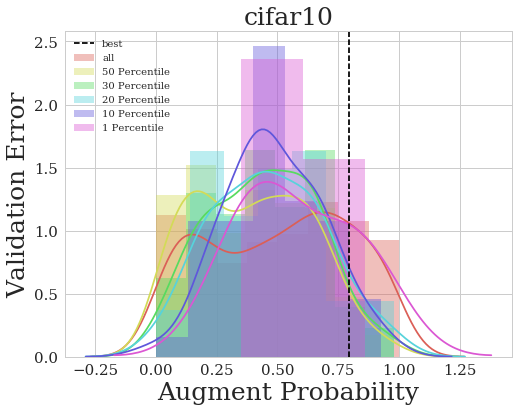

In [26]:
current_palette = sns.color_palette("hls", 6)
sns.set_palette(current_palette)


sns.set_palette(current_palette)
sns.distplot(X[:, 2], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 2], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 2], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 2], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 2], label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 2], label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
print(X[idx, 2], y[idx])
plt.axvline(X[idx, 2], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Augment Probability', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

** Vertical Flip**

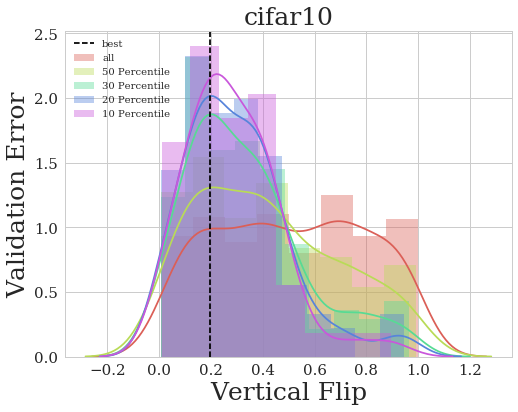

In [27]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 0], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 0], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 0], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 0], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 0], label='10 Percentile', norm_hist=True)

idx = np.argmin(y)

plt.axvline(X[idx, 0], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Vertical Flip', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

0.816214848512 0.19020000000000004


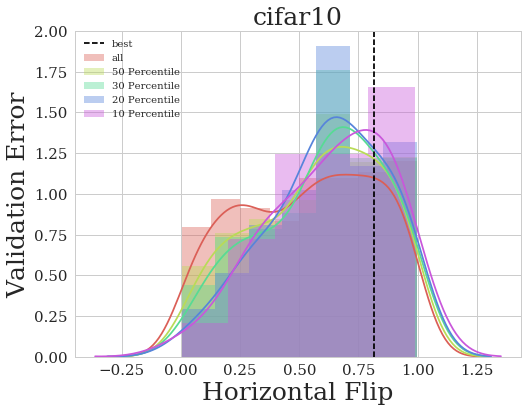

In [28]:
current_palette= sns.color_palette("hls", 5)
sns.set_palette(current_palette)
sns.distplot(X[:, 1], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 1], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 1], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 1], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 1], label='10 Percentile', norm_hist=True)

idx = np.argmin(y)
print(X[idx, 1], y[idx])
plt.axvline(X[idx, 1], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Horizontal Flip', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

0.619308514614 0.19020000000000004
1.39193861991 0.19020000000000004
-98.0 0.19020000000000004


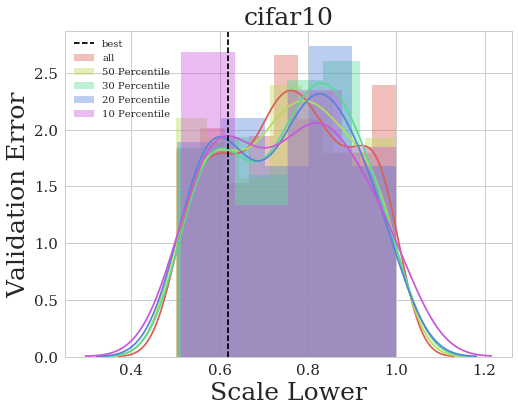

In [29]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 3], label='all', norm_hist=True) # use named tuple here



p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 3], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 3], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 3], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 3], label='10 Percentile', norm_hist=True)

idx = np.argmin(y)
print(X[idx, 3], y[idx])
print(X[idx, 4], y[idx])
print(X[idx, 12], y[idx])
plt.axvline(X[idx, 3], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Scale Lower', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

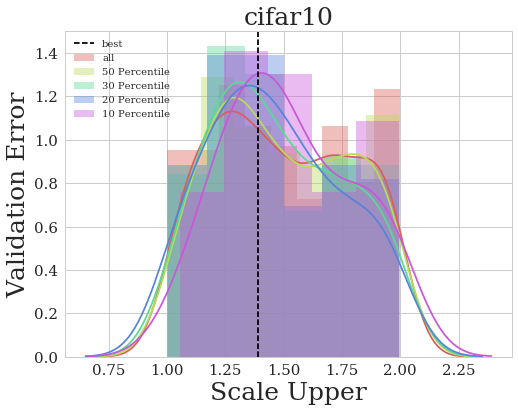

In [30]:

current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 4], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 4], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 4], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 4], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 4], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 4], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Scale Upper', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

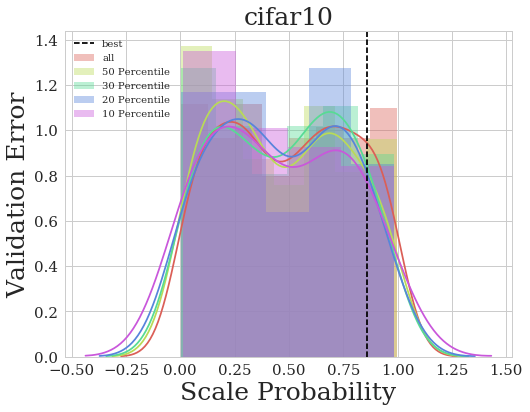

In [31]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 5], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 5], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 5], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 5], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 5], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 5], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Scale Probability', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

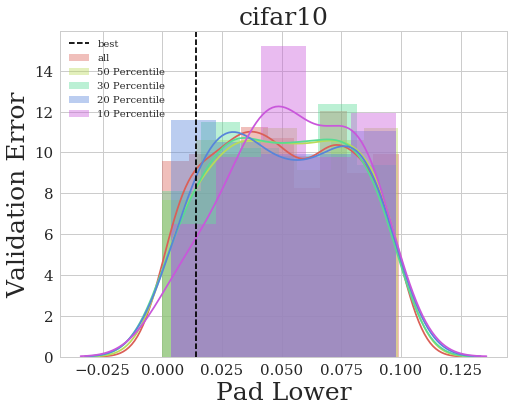

In [32]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 6], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 6], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 6], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 6], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 6], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 6], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Pad Lower', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

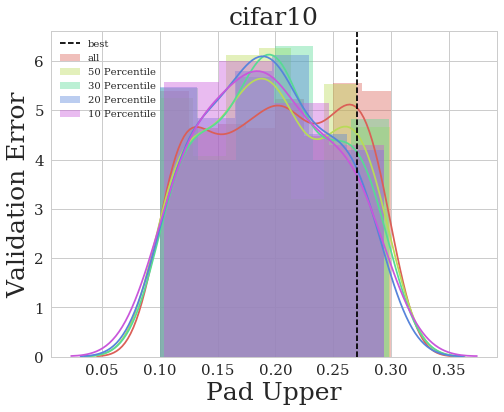

In [33]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 7], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 7], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 7], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 7], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 7], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 7], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Pad Upper', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

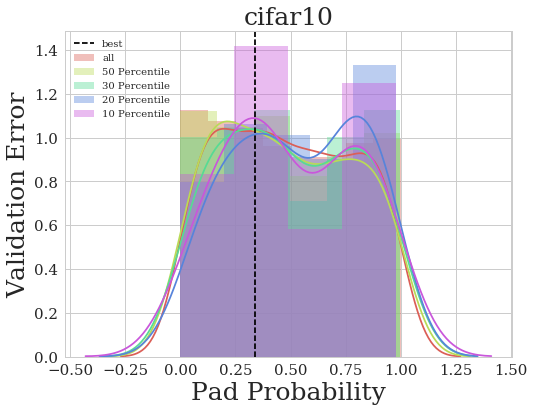

In [34]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 8], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 8], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 8], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 8], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 8], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 8], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Pad Probability', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

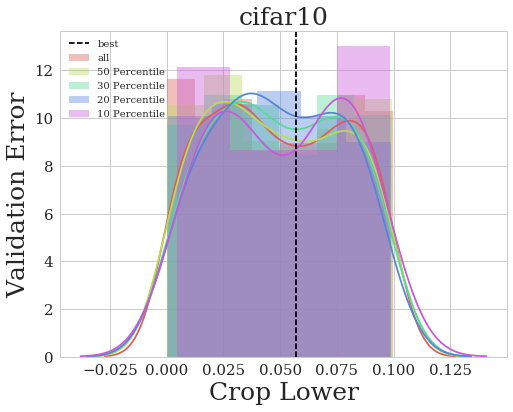

In [35]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 9], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 9], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 9], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 9], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 9], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 9], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Crop Lower', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

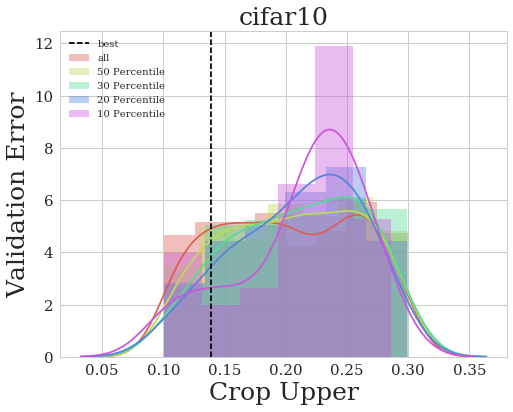

In [36]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 10], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 10], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 10], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 10], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 10], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 10], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Crop Upper', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

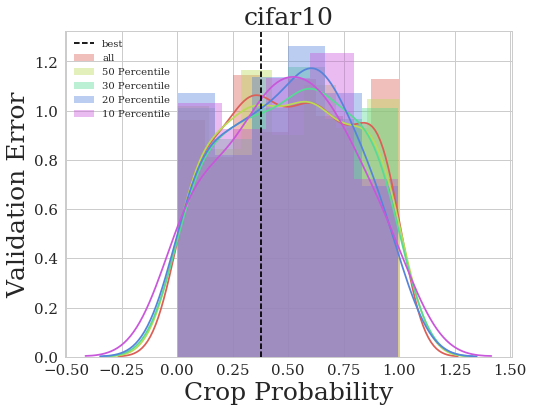

In [37]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 11], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 11], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 11], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 11], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 11], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 11], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Crop Probability', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

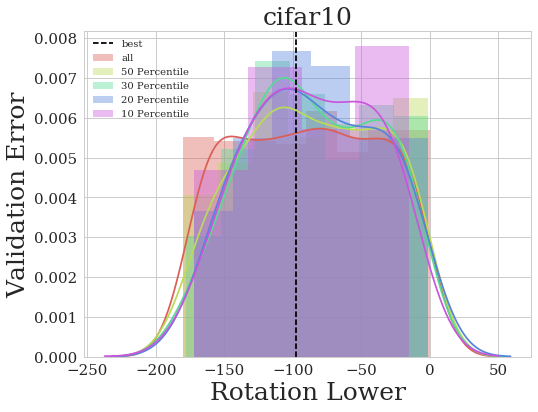

In [38]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 12], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 12], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 12], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 12], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 12], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 12], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Rotation Lower', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

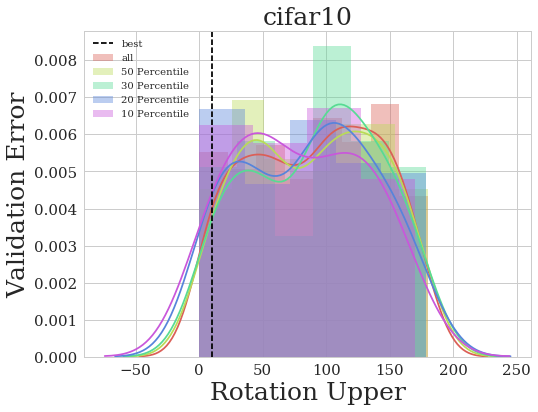

In [39]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 13], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 13], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 13], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 13], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 13], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 13], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Rotation Upper', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

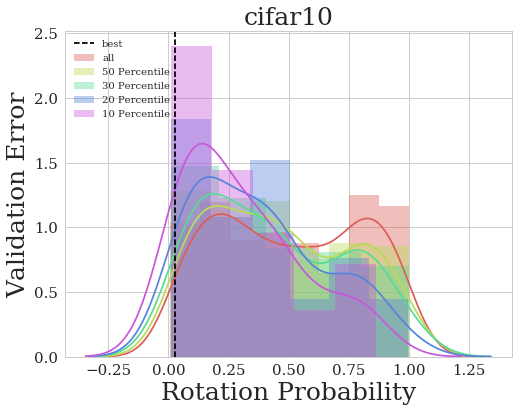

In [40]:
current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 14], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 14], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 14], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 14], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 14], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 14], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Rotation Probability', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

['vertical_flip', 'horizontal_flip', 'augment_probability', 'scale_lower', 'scale_upper', 'scale_probability', 'pad_lower', 'pad_upper', 'pad_probability', 'crop_lower', 'crop_upper', 'crop_probability', 'rotation_lower', 'rotation_upper', 'rotation_probability']


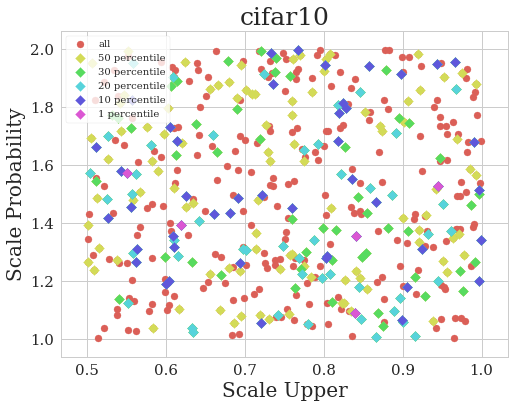

In [41]:
params= ['vertical_flip', 'horizontal_flip', 'augment_probability', 'scale_lower', 'scale_upper',
        'scale_probability', 'pad_upper', 'pad_lower', 'pad_probability', 'crop_upper', 'crop_lower',
        'crop_probability', 'rotation_upper', 'rotation_lower', 'rotation_probability' 
       ] # change order to params

current_palette_7 = sns.color_palette("hls", 6)
sns.set_palette(current_palette_7)

plt.scatter(X[:, 3], X[:, 4] , color=current_palette_7[0], label="all")

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
plt.scatter(X[perc_50, 3], X[perc_50, 4] , color=current_palette_7[1], label="50 percentile", marker="D")

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
plt.scatter(X[perc_30, 3], X[perc_30, 4], color=current_palette_7[2], label="30 percentile", marker="D")

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
plt.scatter(X[perc_20, 3], X[perc_20, 4], color=current_palette_7[3], label="20 percentile", marker="D")

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
plt.scatter(X[perc_10, 3], X[perc_10, 4], color=current_palette_7[4], label="10 percentile", marker="D")

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
plt.scatter(X[perc_1, 3], X[perc_1, 4], color=current_palette_7[5], label="1 percentile", marker="D")

print(order)

plt.xlabel("Scale Upper", fontsize=20)
plt.ylabel("Scale Probability", fontsize=20)
legend = plt.legend(frameon=True, fontsize=10, loc=2)
#plt.xlim(-6, -2)
#plt.ylim(3, 8)
plt.title(dataset, fontsize=25)

In [ ]:
current_palette_7 = sns.color_palette("hls", 6)
sns.set_palette(current_palette_7)

plt.scatter(X[:, 12], X[:, 13] , color=current_palette_7[0], label="all")

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
plt.scatter(X[perc_50, 12], X[perc_50, 13], color=current_palette_7[1], label="50 percentile", marker="D")


p = np.percentile(y, 30)
perc_30 = np.where(y < p)
plt.scatter(X[perc_30, 12],  X[perc_30, 13], color=current_palette_7[2], label="30 percentile", marker="D")

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
plt.scatter(X[perc_20, 12], X[perc_20, 13], color=current_palette_7[3], label="20 percentile", marker="D")

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
plt.scatter(X[perc_10, 12],  X[perc_10, 13], color=current_palette_7[4], label="10 percentile", marker="D")

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
plt.scatter(X[perc_1, 12],X[perc_1, 13], color=current_palette_7[5], label="1 percentile", marker="D")

print(order)

plt.xlabel("Rotation Lower", fontsize=20)
plt.ylabel("Rotation Upper", fontsize=20)
legend = plt.legend(frameon=True, fontsize=10, loc=2)
#plt.xlim(-6, -2)
#plt.ylim(3, 8)
plt.title(dataset, fontsize=25)

In [ ]:
current_palette_7 = sns.color_palette("hls", 6)
sns.set_palette(current_palette_7)

plt.scatter(X[:, 6], X[:, 7] , color=current_palette_7[0], label="all")

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
plt.scatter(X[perc_50, 6], X[perc_50, 7], color=current_palette_7[1], label="50 percentile", marker="D")


p = np.percentile(y, 30)
perc_30 = np.where(y < p)
plt.scatter(X[perc_30, 6],  X[perc_30, 7], color=current_palette_7[2], label="30 percentile", marker="D")

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
plt.scatter(X[perc_20, 6], X[perc_20, 7], color=current_palette_7[3], label="20 percentile", marker="D")

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
plt.scatter(X[perc_10, 6],  X[perc_10, 7], color=current_palette_7[4], label="10 percentile", marker="D")

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
plt.scatter(X[perc_1, 6],X[perc_1, 7], color=current_palette_7[5], label="1 percentile", marker="D")

print(order)

plt.xlabel("Pad Lower", fontsize=20)
plt.ylabel("Pad Upper", fontsize=20)
legend = plt.legend(frameon=True, fontsize=10, loc=2)
#plt.xlim(-6, -2)
#plt.ylim(3, 8)
plt.title(dataset, fontsize=25)